In [1]:
from IXIdataset import IXIDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from skimage.transform import resize
from utils import *

In [2]:
dataset = IXIDataset('/data_hdd/users/lisikuang/IXI/T1/valid/')
loader = DataLoader(dataset, batch_size=1, shuffle=True, drop_last=True, num_workers=4)
normalization = dataset.normalization

torch.Size([1, 3, 1, 128, 128])
torch.Size([3, 128, 128])
torch.Size([2])
torch.Size([2, 128, 128])
psnr: 45.40258404320085
ssim: 0.9970305952313336


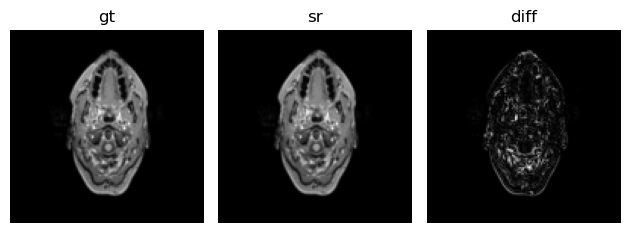

In [3]:
imgs, depth = next(iter(loader))
print(imgs.shape)
imgs = imgs[0].squeeze()
depth = depth[0].squeeze()
print(imgs.shape)
print(depth.shape)

oriimgs = imgs[::2]
print(oriimgs.shape)
imgs_sr = resize(oriimgs, (3, oriimgs.shape[1], oriimgs.shape[2]))

gt = normalization.rerun(imgs[2].numpy())
sr = normalization.rerun(imgs_sr[2])

psnr = compare_psnr(gt, sr)
print('psnr:', psnr)
ssim = compare_ssim(gt, sr, 11)
print('ssim:', ssim)

fig, axs = plt.subplots(1, 3)

axs[0].imshow(gt, cmap="gray")
axs[0].set_title('gt')
axs[0].axis('off')
axs[1].imshow(sr, cmap="gray")
axs[1].set_title('sr')
axs[1].axis('off')
axs[2].imshow(np.abs(sr - gt), cmap="gray")
axs[2].set_title('diff')
axs[2].axis('off')

fig.tight_layout()

plt.show()